<h1>Aplicação da Regressão Linear</h1>

In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("dataset/diabetes-dataset.csv")
df = df.dropna()
df.head(-10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1985,0,131,88,0,0,31.6,0.743,32,1
1986,6,104,74,18,156,29.9,0.722,41,1
1987,3,148,66,25,0,32.5,0.256,22,0
1988,4,120,68,0,0,29.6,0.709,34,0


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


Pregnancies:  1.888019527421971
Glucose:  2.7042137550880043
BloodPressure:  2.2211102173406334
SkinThickness:  2.183718656689922
Insulin:  2.2307889380145642
BMI:  2.586088740860329
DiabetesPedigreeFunction:  1.8278867568983117
Age:  2.137481801286542


<Axes: >

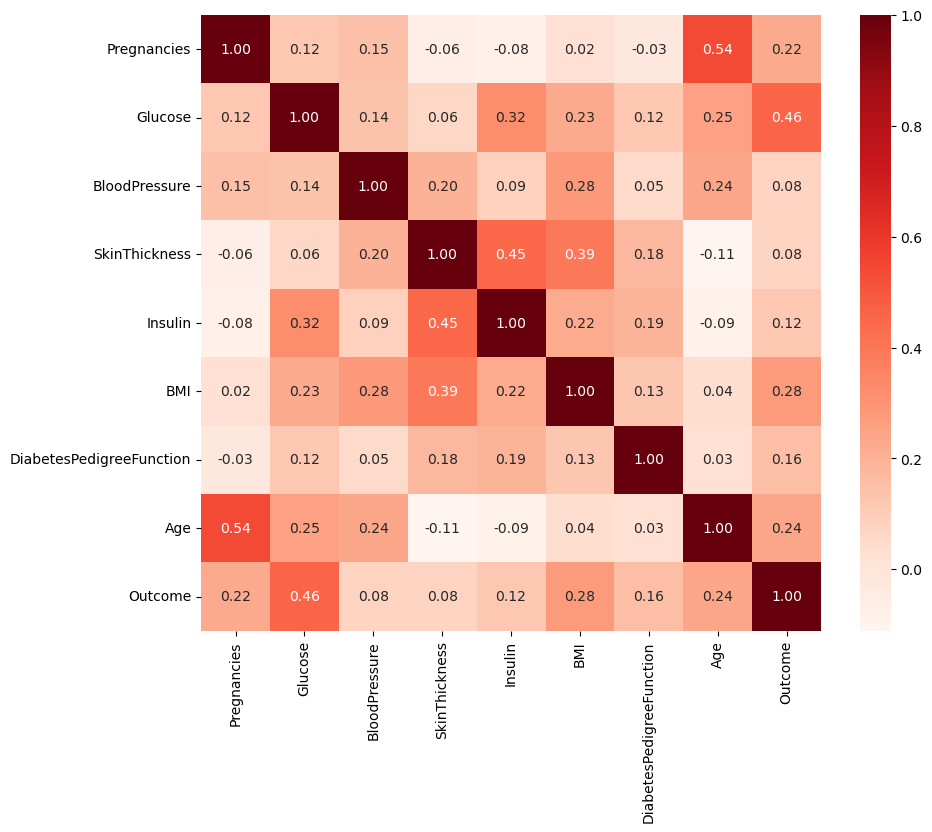

In [4]:
corr = df.corr()
print("Pregnancies: ", corr["Pregnancies"].sum())
print("Glucose: ", corr["Glucose"].sum())
print("BloodPressure: ", corr["BloodPressure"].sum())
print("SkinThickness: ", corr["SkinThickness"].sum())
print("Insulin: ", corr["Insulin"].sum())
print("BMI: ", corr["BMI"].sum())
print("DiabetesPedigreeFunction: ", corr["DiabetesPedigreeFunction"].sum())
print("Age: ", corr["Age"].sum())
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Reds')

In [5]:
X = (df[["Pregnancies", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]]).to_numpy()
y = (df[["Glucose"]]).to_numpy()
y = y.ravel()
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (2000, 8)
y shape:  (2000,)


In [6]:
model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)
R2 = r2_score(y, y_pred)
print('R2 score:', R2)

R2 score: 0.33434011269784947


In [7]:
coef = model.coef_
coef = coef.ravel()
intercept = model.intercept_

print("Coeficientes: ", coef)
print("Intercept: ", intercept)

Coeficientes:  [-0.5972827   0.07730192 -0.27501631  0.09386336  0.339727    0.78349662
  0.54075702 24.85421902]
Intercept:  78.5741470627207


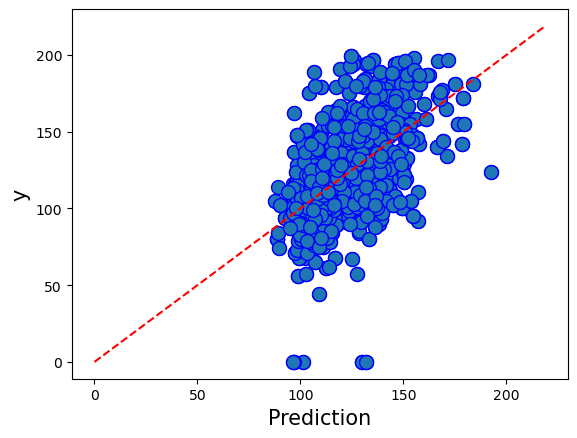

In [8]:
fig = plt.figure()
l = plt.plot(y_pred, y, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra os valores preditos e originais
xl = np.arange(min(y), 1.2*max(y),(max(y)-min(y))/10)

yl = xl
plt.plot(xl, yl, 'r--')
plt.show(True)

In [9]:
X_df = df[["Pregnancies", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]]
y_df = df[["Glucose"]]
X_df = sm.add_constant(X_df)
est = sm.OLS(y_df, X_df).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Glucose   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     125.0
Date:                Sat, 04 Nov 2023   Prob (F-statistic):          6.94e-170
Time:                        20:26:04   Log-Likelihood:                -9366.2
No. Observations:                2000   AIC:                         1.875e+04
Df Residuals:                    1991   BIC:                         1.880e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       78.5741      3.203     24.529      0.000      72.292      84.856
Pregnancies                 -0.5973      0.213     -2.803      0.005      -1.015      -0.179
BloodPressure                0.0773      0.033      2.330      0.020       0.012       0.142
SkinThickness               -0.2750      0.044     -6.234      0.000      -0.362      -0.189
Insulin                      0.0939      0.006     15.661      0.000       0.082       0.106
BMI                          0.3397      0.083      4.072      0.000       0.176       0.503
DiabetesPedigreeFunction     0.7835      1.878      0.417      0.677      -2.899       4.466
Age                          0.5408      0.062      8.789      0.000       0.420       0.661
Outcome                     24.8542      1.354     18.360      0.000      22.199      27.509
==============================================================================
Omnibus:                      112.642   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              381.272
Skew:                          -0.183   Prob(JB):                     1.61e-83
Kurtosis:                       5.108   Cond. No.                         829.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h1>Aplicação da Regressão Linear sem o coeficiente de maior p-valor: "DiabetesPedigreeFunction"</h1>

In [10]:
X = (df[["Pregnancies", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age", "Outcome"]]).to_numpy()
y = (df[["Glucose"]]).to_numpy()
y = y.ravel()
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (2000, 7)
y shape:  (2000,)


In [11]:
model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)
R2 = r2_score(y, y_pred)
print('R2 score:', R2)

R2 score: 0.3342819173419348


In [12]:
coef = model.coef_
coef = coef.ravel()
intercept = model.intercept_

print("Coeficientes: ", coef)
print("Intercept: ", intercept)

Coeficientes:  [-0.60249413  0.07732003 -0.27333832  0.09414676  0.34031942  0.54191986
 24.92335992]
Intercept:  78.82209678584942


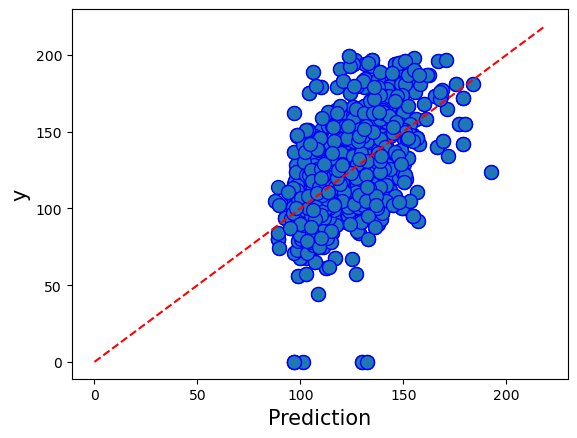

In [13]:
fig = plt.figure()
l = plt.plot(y_pred, y, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra os valores preditos e originais
xl = np.arange(min(y), 1.2*max(y),(max(y)-min(y))/10)

yl = xl
plt.plot(xl, yl, 'r--')
plt.show(True)

In [ ]:
X_df = df[["Pregnancies", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age", "Outcome"]]
y_df = df[["Glucose"]]
X_df = sm.add_constant(X_df)
est = sm.OLS(y_df, X_df).fit()
est.summary()

<h1>Aplicacão da Regressão Logística</h1>

In [ ]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv("dataset/diabetes-dataset.csv")
df = df.dropna()
df.head(-10)

In [ ]:
df.describe()

In [ ]:
X = (df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]]).to_numpy()
y = (df[["Outcome"]]).to_numpy()
y = y.ravel()
print("X shape: ", X.shape)
print("y shape: ", y.shape)

In [ ]:
model = LogisticRegression(tol = 0.0 ,max_iter = 10000)
model.fit(X,y)
y_pred = model.predict(X)
print("Total Score with train dataset: ", model.score(X, y))

In [ ]:
coef = model.coef_
coef = coef.ravel()
intercept = model.intercept_

print("Coeficientes: ", coef)
print("Intercept: ", intercept)

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(18, 15))

axs[0, 0].scatter(X[:,0],y, label = "Real")
axs[0, 0].scatter(X[:,0],y_pred, label = "Prediction")
axs[0, 0].set_title('Pregnancies x Diabetes')
axs[0, 0].set_xlabel("Pregnancies")
axs[0, 0].set_ylabel("Diabetes")
axs[0,0].legend()

axs[0, 1].scatter(X[:,1],y, label = "Real")
axs[0, 1].scatter(X[:,1],y_pred, label = "Prediction")
axs[0, 1].set_title('Glucose x Diabetes')
axs[0, 1].set_xlabel("Glucose")
axs[0, 1].set_ylabel("Diabetes")
axs[0,1].legend()

axs[1, 0].scatter(X[:,2],y, label = "Real")
axs[1, 0].scatter(X[:,2],y_pred, label = "Prediction")
axs[1, 0].set_title('BloodPressure x Diabetes')
axs[1, 0].set_xlabel("BloodPressure")
axs[1, 0].set_ylabel("Diabetes")
axs[1,0].legend()

axs[1, 1].scatter(X[:,3],y, label = "Real")
axs[1, 1].scatter(X[:,3],y_pred, label = "Prediction")
axs[1, 1].set_title('SkinThickness x Diabetes')
axs[1, 1].set_xlabel("SkinThickness")
axs[1, 1].set_ylabel("Diabetes")
axs[1,1].legend()

axs[2, 0].scatter(X[:,4],y, label = "Real")
axs[2, 0].scatter(X[:,4],y_pred, label = "Prediction")
axs[2, 0].set_title('Insulin x Diabetes')
axs[2, 0].set_xlabel("Insulin")
axs[2, 0].set_ylabel("Diabetes")
axs[2,0].legend()

axs[2, 1].scatter(X[:,5],y, label = "Real")
axs[2, 1].scatter(X[:,5],y_pred, label = "Prediction")
axs[2, 1].set_title('BMI x Diabetes')
axs[2, 1].set_xlabel("BMI")
axs[2, 1].set_ylabel("Diabetes")
axs[2,1].legend()

axs[3, 0].scatter(X[:,6],y, label = "Real")
axs[3, 0].scatter(X[:,6],y_pred, label = "Prediction")
axs[3, 0].set_title('DiabetesPedigreeFunction x Diabetes')
axs[3, 0].set_xlabel("DiabetesPedigreeFunction")
axs[3, 0].set_ylabel("Diabetes")
axs[3,0].legend()

axs[3, 1].scatter(X[:,7],y, label = "Real")
axs[3, 1].scatter(X[:,7],y_pred, label = "Prediction")
axs[3, 1].set_title('Age x Diabetes')
axs[3, 1].set_xlabel("Age")
axs[3, 1].set_ylabel("Diabetes")
axs[3,1].legend()

plt.subplots_adjust(wspace=0.1)
plt.subplots_adjust(hspace=0.5)

In [ ]:
X = df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]]
y = df[["Outcome"]]
X = sm.add_constant(X)
est = sm.Logit(y, X).fit()
est.summary()

<h1> Análise sem a característica de maior p-valor: "SkinThickness" </h1>

In [ ]:
X = (df[["Pregnancies", "Glucose", "BloodPressure", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]]).to_numpy()
y = (df[["Outcome"]]).to_numpy()
y = y.ravel()
print("X shape: ", X.shape)
print("y shape: ", y.shape)

In [ ]:
model = LogisticRegression(tol = 0.0 ,max_iter = 10000)
model.fit(X,y)
y_pred = model.predict(X)
print("Total Score with train dataset: ", model.score(X, y))

In [ ]:
coef = model.coef_
coef = coef.ravel()
intercept = model.intercept_

print("Coeficientes: ", coef)
print("Intercept: ", intercept)

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(18, 15))

axs[0, 0].scatter(X[:,0],y, label = "Real")
axs[0, 0].scatter(X[:,0],y_pred, label = "Prediction")
axs[0, 0].set_title('Pregnancies x Diabetes')
axs[0, 0].set_xlabel("Pregnancies")
axs[0, 0].set_ylabel("Diabetes")
axs[0,0].legend()

axs[0, 1].scatter(X[:,1],y, label = "Real")
axs[0, 1].scatter(X[:,1],y_pred, label = "Prediction")
axs[0, 1].set_title('Glucose x Diabetes')
axs[0, 1].set_xlabel("Glucose")
axs[0, 1].set_ylabel("Diabetes")
axs[0,1].legend()

axs[1, 0].scatter(X[:,2],y, label = "Real")
axs[1, 0].scatter(X[:,2],y_pred, label = "Prediction")
axs[1, 0].set_title('BloodPressure x Diabetes')
axs[1, 0].set_xlabel("BloodPressure")
axs[1, 0].set_ylabel("Diabetes")
axs[1,0].legend()

axs[1,1].scatter(X[:,3],y, label = "Real")
axs[1,1].scatter(X[:,3],y_pred, label = "Prediction")
axs[1,1].set_title('Insulin x Diabetes')
axs[1,1].set_xlabel("Insulin")
axs[1,1].set_ylabel("Diabetes")
axs[1,1].legend()

axs[2, 0].scatter(X[:,4],y, label = "Real")
axs[2, 0].scatter(X[:,4],y_pred, label = "Prediction")
axs[2, 0].set_title('BMI x Diabetes')
axs[2, 0].set_xlabel("BMI")
axs[2, 0].set_ylabel("Diabetes")
axs[2, 0].legend()

axs[2,1].scatter(X[:,5],y, label = "Real")
axs[2,1].scatter(X[:,5],y_pred, label = "Prediction")
axs[2,1].set_title('DiabetesPedigreeFunction x Diabetes')
axs[2,1].set_xlabel("DiabetesPedigreeFunction")
axs[2,1].set_ylabel("Diabetes")
axs[2,1].legend()

axs[3, 0].scatter(X[:,6],y, label = "Real")
axs[3, 0].scatter(X[:,6],y_pred, label = "Prediction")
axs[3, 0].set_title('Age x Diabetes')
axs[3, 0].set_xlabel("Age")
axs[3, 0].set_ylabel("Diabetes")
axs[3, 0].legend()

plt.subplots_adjust(wspace=0.1)
plt.subplots_adjust(hspace=0.5)

In [ ]:
conf_matrix = confusion_matrix(y, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
X = df[["Pregnancies", "Glucose", "BloodPressure", "Insulin", "DiabetesPedigreeFunction", "Age"]]
y = df[["Outcome"]]
X = sm.add_constant(X)
est = sm.Logit(y, X).fit()
est.summary()